# Chapter 4. Getting started with neural networks: Classification and regression

### Listing 4.1 Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

np.int64(1)

Because we’re restricting ourselves to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [5]:
max([max(sequence) for sequence in train_data])

9999

here’s how you can quickly decode one of these reviews back to English words

### Listing 4.2 Decoding reviews back to text

In [6]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_reviews = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

print(decode_reviews)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 4.1.2 Preparing the data

Listing 4.3 Encoding the integer sequences via multi-hot encoding

In [7]:
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimention = 10000):
  results = np.zeros((len(sequences), dimention))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Here’s what the samples look like now:

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels, which is straightforward:

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Now the data is ready to be fed into a neural network.

### 4.1.3 Building your model

There are two key architecture decisions to be made about such a stack of Dense layers:

- How many layers to use

- How many units to choose for each layer

In chapter 5, you’ll learn formal principles to guide you in making these choices. For the time being, you’ll have to trust me with the following architecture choices:

- Two intermediate layers with 16 units each

- A third layer that will output the scalar prediction regarding the sentiment of the current review

### Listing 4.4 Model definition

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model = keras.Sequential([
                        layers.Dense(16, activation="relu"),
                        layers.Dense(16, activation="relu"),
                        layers.Dense(1, activation="sigmoid")
                        ])

Here’s the step where we configure the model with the rmsprop optimizer and
the binary_crossentropy loss function. Note that we’ll also monitor accuracy during
training.

### Listing 4.5 Compiling the model

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 4.1.4 Validating your approach

Setting aside a validation set

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train the model for 20 epochs (20 iterations over all samples in the training
data) in mini-batches of 512 samples. At the same time, we will monitor loss and
accuracy on the 10,000 samples that we set apart. We do so by passing the validation
data as the validation_data argument.

### Listing 4.7 Training your model

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                     validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5028 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5083 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5021 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5080 - loss: 0.6931 - val_accuracy: 0.4947 - v

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Listing 4.8 Plotting the training and validation loss

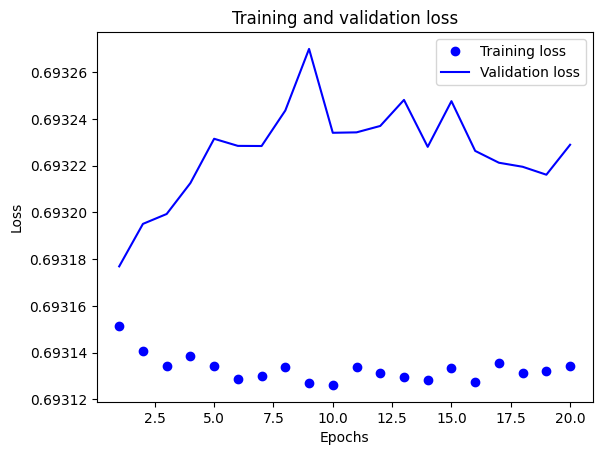

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Figure 4.4 Training and validation loss

### Listing 4.9 Plotting the training and validation accuracy

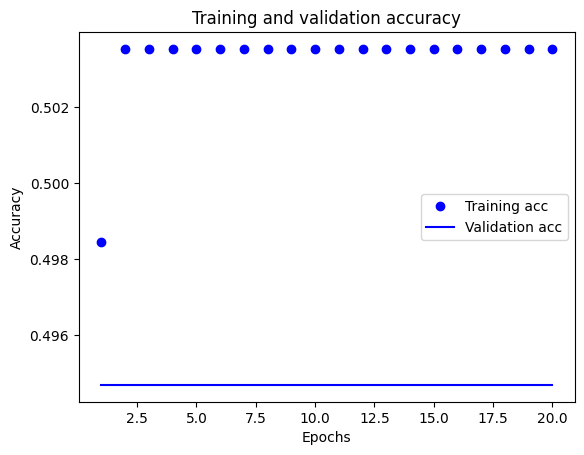

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
# Embed the image into the notebook
def embed_image(filename):
  from IPython.display import Image, display
  import base64

  with open(filename, "rb") as f:
    data = base64.b64encode(f.read()).decode()

  display(Image(data=base64.b64decode(data)))

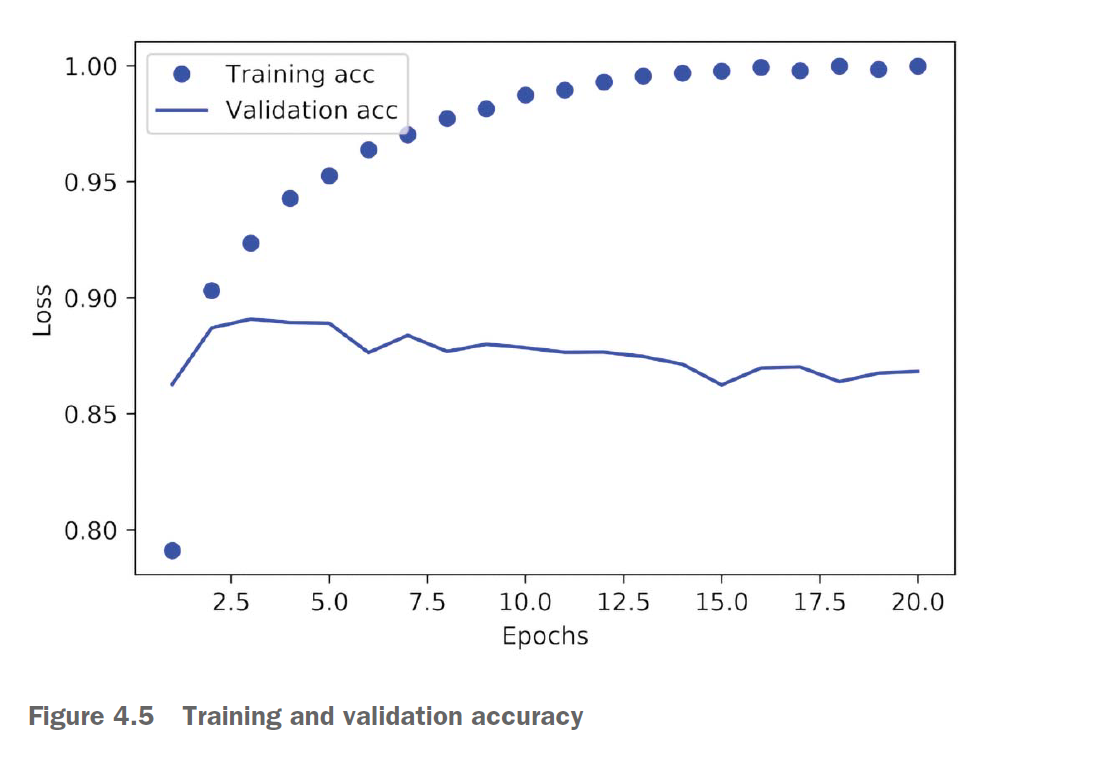

In [21]:
embed_image("C:/Users/mistr/Pictures/Screenshots/DL_04.png")

### Listing 4.10 Retraining a model from scratch

In [22]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

In [23]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [24]:
model.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4989 - loss: 0.6932
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5095 - loss: 0.6931
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5008 - loss: 0.6932
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4942 - loss: 0.6932
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4972 - loss: 0.6932
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4936 - loss: 0.6932
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4966 - loss: 0.6932
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4977 - loss: 0.6932
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4972 - loss: 0.6932
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4986 - loss: 0.6932
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5012 - loss: 0.6932
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4972 - lo

In [25]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4930 - loss: 0.6932


In [26]:
results

[0.6931478977203369, 0.5000399947166443]

The first number, 0.69, is the test loss, and the second number, 0.50, is the test accuracy.

### 4.1.5 Using a trained model to generate predictions on new data

In [27]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.4892162 ],
       [0.50030494],
       [0.50030494],
       ...,
       [0.50030494],
       [0.50030494],
       [0.50030494]], dtype=float32)

# Listing 4.11 Loading the Reuters dataset

In [28]:
from tensorflow.keras.datasets import reuters

In [29]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

As with the IMDB dataset, the argument num_words=10000 restricts the data to the
10,000 most frequently occurring words found in the data.
You have 8,982 training examples and 2,246 test examples:

In [30]:
len(train_data)

8982

In [31]:
len(test_data)

2246

As with the IMDB reviews, each example is a list of integers (word indices):

In [32]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Here’s how you can decode it back to words, in case you’re curious.

### Listing 4.12 Decoding newswires back to text

In [33]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_reviews = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [34]:
decode_reviews

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [35]:
train_labels[10]

np.int64(3)

### 4.2.2 Preparing the data

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Listing 4.14 Encoding the labels

In [37]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))

  for i, label in enumerate(labels):
    results[i, label] = 1
  return results


x_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras:

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 4.2.3 Building your model

### Listing 4.15 Model definition

In [40]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

There are two other things you should note about this architecture.
First, we end the model with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class.

Second, the last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the model will output a probability distribution over the 46 different
output classes—for every input sample, the model will produce a 46-dimensional output
vector, where output[i] is the probability that the sample belongs to class i. The
46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.

### Listing 4.16 Compiling the model

In [41]:
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

### 4.2.4 Validating your approach
Let’s set apart 1,000 samples in the training data to use as a validation set.

Listing 4.17 Setting aside a validation set

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Now, let’s train the model for 20 epochs

### Listing 4.18 Training the model

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3577 - loss: 3.6624 - val_accuracy: 0.6820 - val_loss: 3.2721
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6777 - loss: 3.1342 - val_accuracy: 0.6820 - val_loss: 2.6611
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6770 - loss: 2.4974 - val_accuracy: 0.6820 - val_loss: 1.9740
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6753 - loss: 1.8353 - val_accuracy: 0.7280 - val_loss: 1.4632
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7212 - loss: 1.3715 - val_accuracy: 0.7720 - val_loss: 1.1554
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7841 - loss: 1.1205 - val_accuracy: 0.8340 - val_loss: 0.9392
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8364 - loss: 0.8927 - val_accuracy: 0.8510 - val_loss: 0.7712
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8630 - loss: 0.7078 - val_accuracy: 0.8710 - val_los

And finally, let’s display its loss and accuracy curves (see figures 4.6 and 4.7).

Listing 4.19 Plotting the training and validation loss

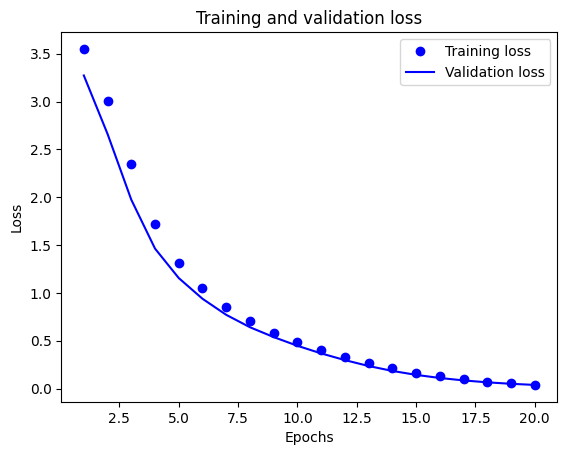

In [44]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Listing 4.20 Plotting the training and validation accuracy

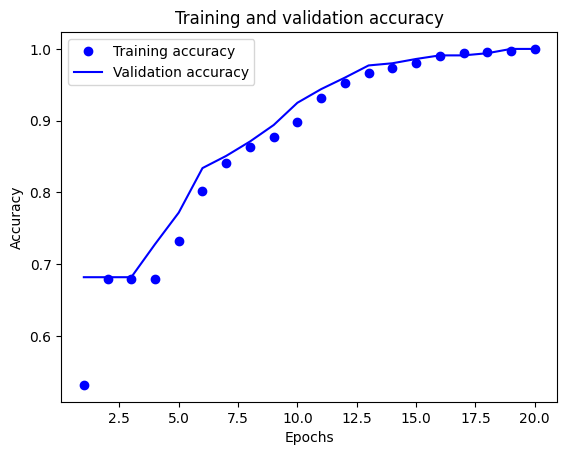

In [45]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs. Let’s train a new model from scratch
for nine epochs and then evaluate it on the test set.

### Listing 4.21 Retraining a model from scratch

In [98]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.datasets import reuters

# Load dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

# Preprocess input data
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

# One-hot encode targets
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512)


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1463 - loss: 942.3032    
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2073 - loss: 379.9356 
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2178 - loss: 220.9706 
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1942 - loss: 109.8931 
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1930 - loss: 29.5759 
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2806 - loss: 8.2494 
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3186 - loss: 4.6628 
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3293 - loss: 3.8582 
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3460 - loss: 3.6098 


In [99]:
results = model.evaluate(x_test, y_test)
print("Test accuracy:", results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3435 - loss: 4.8784
Test accuracy: [4.341805458068848, 0.34594833850860596]


In [100]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.1834372217275156)

As you can see, a random classifier would score around 19% classification accuracy, so
the results of our model seem pretty good in that light.

### 4.2.5 Generating predictions on new data

In [101]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Each entry in “predictions” is a vector of length 46:

In [102]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1, as they form a probability distribution

In [103]:
np.sum(predictions[0])

np.float32(0.99999994)

The largest entry is the predicted class—the class with the highest probability:

In [104]:
np.argmax(predictions[0])

np.int64(3)

### 4.2.6 A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as
an integer tensor

In [105]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss
function used in listing 4.21, categorical_crossentropy, expects the labels to follow
a categorical encoding. With integer labels, you should use sparse_categorical_
crossentropy:

In [106]:
model.compile(optimizer="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

This new loss function is still mathematically the same as categorical_crossentropy;
it just has a different interface.

## 4.2.7 The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 units. Now let’s see what happens
when we introduce an information bottleneck by having intermediate layers that are
significantly less than 46-dimensional: for example, 4-dimensional

### Listing 4.22 A model with an information bottleneck

In [108]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(4, activation="relu"),
  layers.Dense(46, activation="softmax")
])

In [109]:
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [110]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          validation_data = (x_val, y_val))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2621 - loss: 3.2242 - val_accuracy: 0.5760 - val_loss: 1.5721
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6109 - loss: 1.3326 - val_accuracy: 0.7130 - val_loss: 0.9186
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7257 - loss: 0.8465 - val_accuracy: 0.8010 - val_loss: 0.6237
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.5757 - val_accuracy: 0.8680 - val_loss: 0.4043
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8914 - loss: 0.3435 - val_accuracy: 0.9200 - val_loss: 0.2806
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.2525 - val_accuracy: 0.9240 - val_loss: 0.2121
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9403 - loss: 0.1843 - val_accuracy: 0.9530 - val_loss: 0.1622
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.1313 - val_accuracy: 0.

The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is
mostly due to the fact that we’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The model is able to cram most of the necessary
information into these four-dimensional representations, but not all of it.

## 4.3 Predicting house prices: A regression example

#### 4.3.1 The Boston housing price dataset

Listing 4.23 Loading the Boston housing dataset

In [111]:
from tensorflow.keras.datasets import boston_housing

In [112]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


In [113]:
train_data.shape

(404, 13)

In [114]:
test_data.shape

(102, 13)

As you can see, we have 404 training samples and 102 test samples, each with 13
numerical features, such as per capita crime rate, average number of rooms per dwelling,
accessibility to highways, and so on.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [123]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between $10,000 and $50,000. If that sounds cheap, remember
that this was the mid-1970s, and these prices aren’t adjusted for inflation.

### 4.3.2 Preparing the data

It would be problematic to feed into a neural network values that all take wildly different
ranges. The model might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
for dealing with such data is to do feature-wise normalization: for each feature in the
input data (a column in the input data matrix), we subtract the mean of the feature
and divide by the standard deviation, so that the feature is centered around 0 and has
a unit standard deviation. This is easily done in NumPy.

Listing 4.24 Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the
training data. You should never use any quantity computed on the test data in your
workflow, even for something as simple as data normalization.

#### 4.3.3 Building your model

Listing 4.25 Model definition

Because so few samples are available, we’ll use a very small model with two intermediate
layers, each with 64 units. In general, the less training data you have, the worse
overfitting will be, and using a small model is one way to mitigate overfitting.

In [137]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
  ])

  model.compile(optimizer="rmsprop",
                loss="mse",
                metrics=["mae"])
  
  return model  

The model ends with a single unit and no activation (it will be a linear layer). This is a
typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value). 

Applying an activation function would constrain the range the output
can take; 

for instance, if you applied a sigmoid activation function to the last layer,
the model could only learn to predict values between 0 and 1. 

Here, because the last
layer is purely linear, the model is free to learn to predict values in any range.


Note that we compile the model with the mse loss function—mean squared error, the
square of the difference between the predictions and the targets. This is a widely used
loss function for regression problems.


We’re also monitoring a new metric during training: mean absolute error (MAE). It’s the
absolute value of the difference between the predictions and the targets. For instance, an
MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

### 4.3.4 Validating your approach using K-fold validation

To evaluate our model while we keep adjusting its parameters (such as the number of
epochs used for training), we could split the data into a training set and a validation
set, as we did in the previous examples. But because we have so few data points, the
validation set would end up being very small (for instance, about 100 examples). 

As a consequence, the validation scores might change a lot depending on which data
points we chose for validation and which we chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent us
from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation (see figure 4.8).

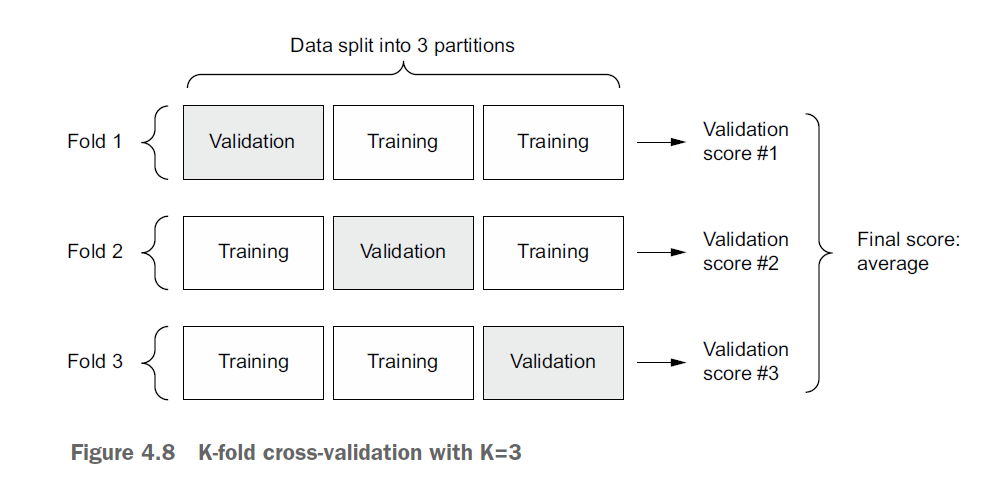

In [138]:
embed_image("C:/Users/mistr/Pictures/Screenshots/DL_05.png")

It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating
K identical models, and training each one on K – 1 partitions while evaluating
on the remaining partition. The validation score for the model used is then the average
of the K validation scores obtained. In terms of code, this is straightforward.

Listing 4.26 K-fold validation

In [139]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                                        [train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
                                          [train_targets[:i * num_val_samples],
                                          train_targets[(i + 1) * num_val_samples:]],
                                          axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [140]:
all_scores

[3.8794867992401123, 4.019637107849121, 3.2083559036254883, 4.0729169845581055]

In [141]:
np.mean(all_scores)

np.float64(3.795099198818207)

Let’s try training the model a bit longer: 500 epochs. To keep a record of how well
the model does at each epoch, we’ll modify the training loop to save the per-epoch
validation score log for each fold.

Listing 4.27 Saving the validation logs at each fold

In [142]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                                        [train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
                                        [train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],
                                        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


We can then compute the average of the per-epoch MAE scores for all folds

#### Listing 4.28 Building the history of successive mean K-fold validation scores

In [143]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### Listing 4.29 Plotting validation scores

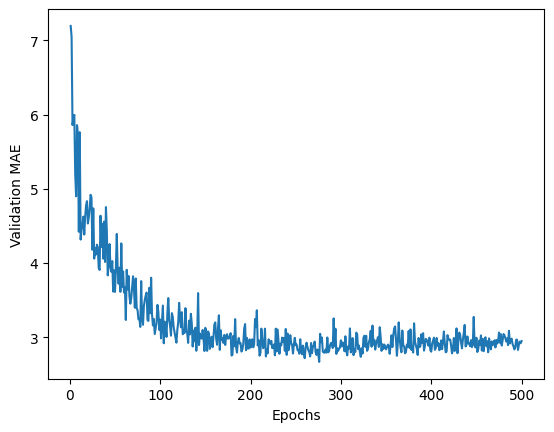

In [144]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

It may be a little difficult to read the plot, due to a scaling issue: the validation MAE
for the first few epochs is dramatically higher than the values that follow. Let’s omit
the first 10 data points, which are on a different scale than the rest of the curve.

#### Listing 4.30 Plotting validation scores, excluding the first 10 data points

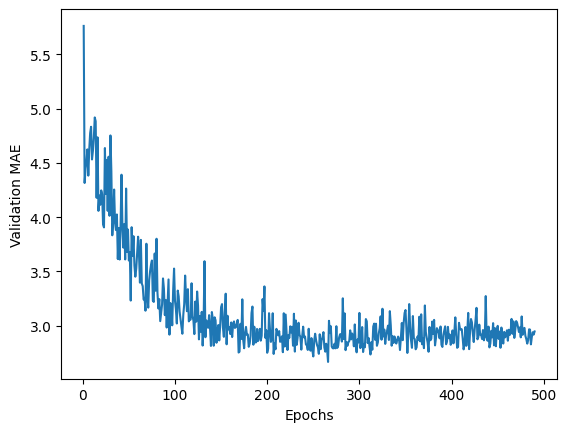

In [145]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# 143